# Final Project - California Housing Data

Evaluating the correlation between several different factors of California housing on its price

In [112]:
# reading into the data set 

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

housing = 'housing.csv'
df = pd.read_csv(housing)

Dictionary key for columns:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

## Exploratory Data Analysis

In [114]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [115]:
# Number of rows and columns 
df.shape
print('Rows = 20,640')
print('Columns = 10')

Rows = 20,640
Columns = 10


In [116]:
# Looking at statistics for each of the columns 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [117]:
# Cleaning the Data

# checking for null values and unique values 
# decided not to do unique values since all numbers are wide variety of floats
    # majority of data set are unique values 

In [118]:
#only total bedrooms had any null values

print('Null Values in Total Bedrooms')
df.total_bedrooms.isnull().sum()
# shows that there are 207 locations that have null values for bedrooms 

Null Values in Total Bedrooms


207

In [119]:
# Examining the rows with null values for total bedrooms by using boolean filtering 

nullbed = df.total_bedrooms.isnull() == True
df[nullbed].head(10)

# 207 rows with null bedroom values 
# should drop these values bc insufficient data  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


In [120]:
# Evaluating impact of dropping null values, will it have a negative effect?

df.dropna().shape

(20433, 10)

In [121]:
df.shape
# shows that we are only dropping around 200 rows, which is okay because it's very low count compared to whole data set 

(20640, 10)

In [122]:
# naming copy of new data set without null values 
    # doing this as opposed to "inPlace = True" for precaution 
    
df2 = df.dropna()

In [123]:
# checking if all values of feature columns are numerical values (for models)

print(df2.dtypes)
print('')

print('All of the features I plan to use are floats so that is good')

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

All of the features I plan to use are floats so that is good


There are some outliers but because the data set is so large (20,433 values),
they will not affect the outcome of the models. Not necessary to remove.


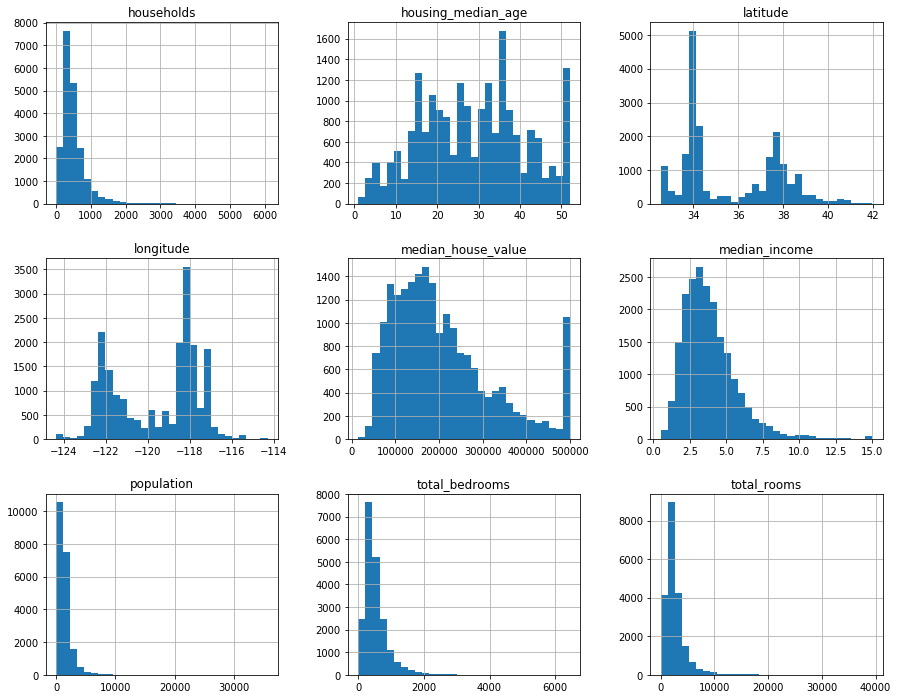

In [124]:
# plotting histograms to examine spread of data 
df2.hist(bins=30,figsize=(15,12));

print('There are some outliers but because the data set is so large (20,433 values),')
print('they will not affect the outcome of the models. Not necessary to remove.')

In [125]:
print('Assigning Independent and Dependent Variables')
print('--------------------------------------------------')
print(' ')

# Target is to predict median house value 
# y = median_house_value

# Independent variables are 
# 1) total_rooms (within a block)
# 2) total_bedrooms (within a block)
# 3) population (within a block)
# 4) households (within a block)
# 5) median income (per household within a block in $10ks)
# 6) housingMedianAge (lower number means newer building)

print('Independent = total rooms, total bedrooms, population, households, median income, housing median age')
print('I chose these features because I thought they would potentially have the greatest impact on price.')
print('')
print('Dependent = median house value')

Assigning Independent and Dependent Variables
--------------------------------------------------
 
Independent = total rooms, total bedrooms, population, households, median income, housing median age
I chose these features because I thought they would potentially have the greatest impact on price.

Dependent = median house value


In [126]:
# Making independent linear regression models with the chosen feature columns 
# -------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


# a) defining the variables 
feature_cols = ['median_income']
feature_cols1 = ['population']
feature_cols2 = ['households']
feature_cols3 = ['housing_median_age']
feature_cols4 = ['total_bedrooms']

X = df2[feature_cols]
X1 = df2[feature_cols1]
X2 = df2[feature_cols2]
X3 = df2[feature_cols3]
X4 = df2[feature_cols4]
y = df2['median_house_value']
y1 = df2['median_house_value']
y2 = df2['median_house_value']
y3 = df2['median_house_value']
y4 = df2['median_house_value']

In [127]:
# b) fitting the variables to the model 

# median income 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# population 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)

# households 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
lr.fit(X2_train, y2_train)
y2_pred = lr.predict(X2_test)

# housing median age 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=1)
lr.fit(X3_train, y3_train)
y3_pred = lr.predict(X3_test)

# total bedrooms 
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
lr.fit(X4_train, y4_train)
y4_pred = lr.predict(X4_test)

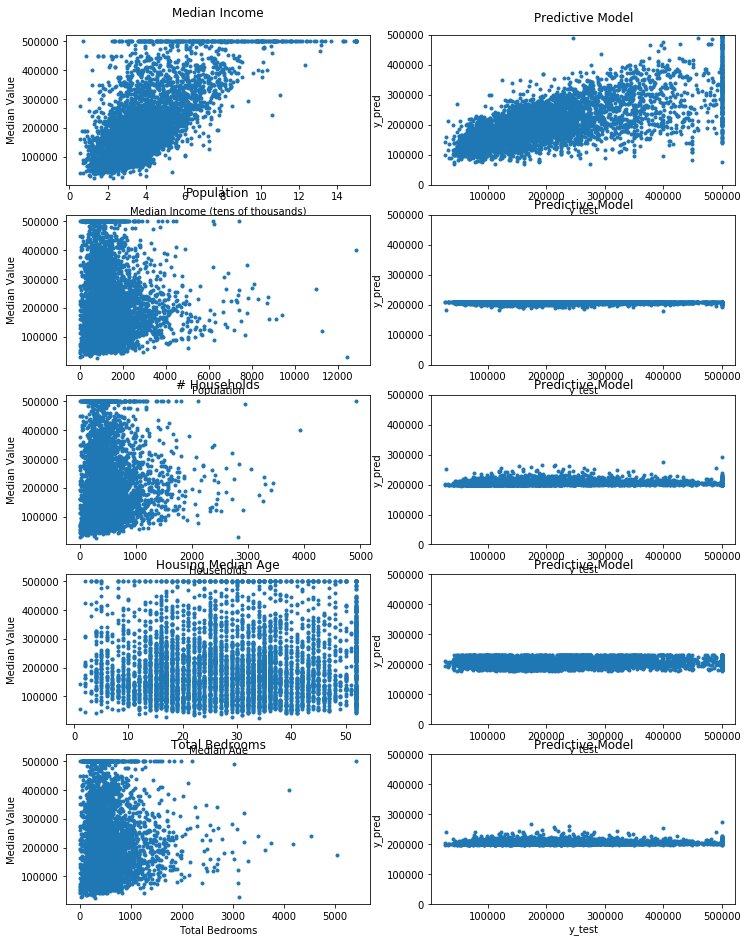

In [128]:
# c) plotting the linear regression graphs  

# Making matrix for plotting 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (12,16));


# median income vs median house value 
axes[0,0].plot(X_test, y_test, '.');
axes[0,0].set_title('Median Income', y=1.08)
axes[0,0].set_xlabel('Median Income (tens of thousands)')
axes[0,0].set_ylabel('Median Value')

axes[0,1].plot(y_test, y_pred, '.');
axes[0,1].set_title('')
axes[0,1].set_ylim([0,500000])
axes[0,1].set_title('Predictive Model', y=1.05);
axes[0,1].set_xlabel('y_test')
axes[0,1].set_ylabel('y_pred')


# population vs median house value 
axes[1,0].plot(X1_test, y1_test, '.');
axes[1,0].set_title('Population', y=1.08)
axes[1,0].set_xlabel('Population')
axes[1,0].set_ylabel('Median Value')

axes[1,1].plot(y1_test, y1_pred, '.');
axes[1,1].set_title('')
axes[1,1].set_ylim([0,500000])
axes[1,1].set_title('Predictive Model');
axes[1,1].set_xlabel('y_test')
axes[1,1].set_ylabel('y_pred')


# households vs median house value 
axes[2,0].plot(X2_test, y2_test, '.');
axes[2,0].set_title('# Households')
axes[2,0].set_xlabel('Households')
axes[2,0].set_ylabel('Median Value')

axes[2,1].plot(y2_test, y2_pred, '.');
axes[2,1].set_title('')
axes[2,1].set_ylim([0,500000])
axes[2,1].set_title('Predictive Model');
axes[2,1].set_xlabel('y_test')
axes[2,1].set_ylabel('y_pred')


# housing median age vs median house value 
axes[3,0].plot(X3_test, y3_test, '.');
axes[3,0].set_title('Housing Median Age')
axes[3,0].set_xlabel('Median Age')
axes[3,0].set_ylabel('Median Value')

axes[3,1].plot(y3_test, y3_pred, '.');
axes[3,1].set_title('')
axes[3,1].set_ylim([0,500000])
axes[3,1].set_title('Predictive Model');
axes[3,1].set_xlabel('y_test')
axes[3,1].set_ylabel('y_pred')

# total bedrooms vs median house value 
axes[4,0].plot(X4_test, y4_test, '.');
axes[4,0].set_title('Total Bedrooms')
axes[4,0].set_xlabel('Total Bedrooms')
axes[4,0].set_ylabel('Median Value')

axes[4,1].plot(y4_test, y4_pred, '.');
axes[4,1].set_title('')
axes[4,1].set_ylim([0,500000])
axes[4,1].set_title('Predictive Model');
axes[4,1].set_xlabel('y_test')
axes[4,1].set_ylabel('y_pred');


In [129]:
print('Analysis of Separate Linear Regression Graphs')
print('-----------------------------------------------------------------')
print('')

print('Only median income has good predictive value.')
print('All the other features predict the same price, regardless of its input (y-pred about the same value across the graph)')

Analysis of Separate Linear Regression Graphs
-----------------------------------------------------------------

Only median income has good predictive value.
All the other features predict the same price, regardless of its input (y-pred about the same value across the graph)


In [130]:
# fitting all X variables to linear regression model 

all_feat = ['median_income', 'population', 'households', 'housing_median_age', 'total_bedrooms']
X0 = df2[all_feat]
y0 = df2['median_house_value']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, random_state=1)
lr.fit(X0_train, y0_train)
y0_pred = lr.predict(X0_test)

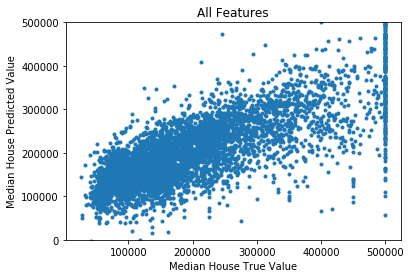

In [131]:
plt.plot(y0_test, y0_pred, '.');
plt.title('All Features');
plt.ylabel('Median House Predicted Value');
plt.xlabel('Median House True Value');
plt.ylim(0,500000);

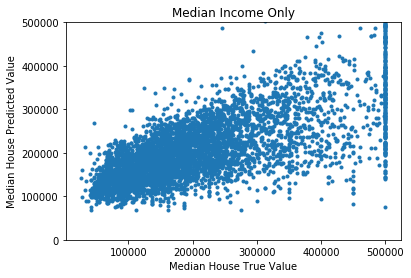

In [132]:
plt.plot(y_test, y_pred, '.');
plt.title('Median Income Only');
plt.ylabel('Median House Predicted Value');
plt.xlabel('Median House True Value');
plt.ylim(0,500000);

In [107]:
print('I want to compare the models between all the features and just median income')
print('since it seemed like the only one with noticable impact on the model.')
print('')
print('Looks pretty similar so we will evaluate metrics and coefficients to get more info.')

I want to compare the models between all the features and just median income
since it seemed like the only one with noticable impact on the model.

Looks pretty similar so we will evaluate metrics and coefficients to get more info.


In [26]:
# Comparing Linear Regression Models with Metrics
# ------------------------------------------------------------

# common evalution metrics for regression problems: 
    # mean absolute error, mean squared error
    # using root mean squared error (RMSE)

In [55]:
from sklearn import metrics
import numpy as np

# calculating MSE for model with all feature columns together
print('Comparison of MSE:')
print('------------------------------------------------------')

rmse_all = np.sqrt(metrics.mean_squared_error(y0_test, y0_pred))
print('All Feature Model MSE is ' + str(rmse_all))

#calulating MSE for model with just median income 
rmse_medin = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Median Income Model MSE is ' + str(rmse_medin))

print(' ')
print('Analysis:')
print('------------------------------------------------------')
print('We are looking for a lower RMSE to indicate higher accuracy of the model.')
print('Because the RMSE of the model with all features included is lower than that of the model with only median income,')
print('it is shown that the model with all features is better.')
print('')
print('Note that as shown in the previous separate linear regression models, the other features aside from median income')
print('were unable to predict the correct price. They only predicted one price, no matter the independent variable value.')
print('However, the addition of all the features collectively increased the accuracy of the model.')

Comparison of RMSE:
------------------------------------------------------
All Feature Model RMSE is 76848.14057371831
Median Income Model RMSE is 83548.04685899982
 
Analysis:
------------------------------------------------------
We are looking for a lower RMSE to indicate higher accuracy of the model.
Because the RMSE of the model with all features included is lower than that of the model with only median income,
it is shown that the model with all features is better.

Note that as shown in the previous separate linear regression models, the other features aside from median income
were unable to predict the correct price. They only predicted one price, no matter the independent variable value.
However, the addition of all the features collectively increased the accuracy of the model.


In [64]:
# Examining the coefficients of each feature to evaluate its impact on the model 

print('Coefficients of each feature')
print('---------------------------------------------------')
print('')

print('1) Median Income')
print(lr.coef_[0])
print('')

print('2) Population')
print(lr.coef_[1])
print('')

print('3) Households')
print(lr.coef_[2])
print('')

print('4) Housing Median Age')
print(lr.coef_[3])
print('')

print('5) Total Bedrooms')
print(lr.coef_[4])

Coefficients of each feature
---------------------------------------------------

1) Median Income
43117.11298698539

2) Population
-41.19588424567393

3) Households
132.38376980151466

4) Housing Median Age
2033.3980021748641

5) Total Bedrooms
14.319915999493006


In [71]:
# Analysis of Coefficients 

print('Coefficient Analysis')
print('-----------------------------------------------------------')
print(' ')
print('The coefficient of median income is over 43,000, much greater than any of the other coefficients')
print('which range from -41 to 2033.')
print('This further proves that median income is the main factor in determining our y value of median house value.')

Coefficient Analysis
-----------------------------------------------------------
 
The coefficient of median income is over 43,000, much greater than any of the other coefficients
which range from -41 to 2033.
This further proves that median income is the main factor in determining our y value of median house value.


In [139]:
print('Final Analysis and Results')
print('------------------------------------------------------')
print(' ')

print('1) Separate Linear Regression Graphs')
print('Shows that only median income provides good predictive value for price.')
print('')

print('2) Comparison of Separate and Combined Linear Regression Graphs')
print('Shows that they appear about the same visually when plotted on graphs.')
print('')

print('3) Comparison of Metrics')
print('Lower RMSE for graph with all features shows that although median income was the main predictor of price,')
print('the addition of the rest of the features collectively improves the model.')
print('')

print('4) Comparison of Coefficients')
print('Large difference between coefficient of median income vs other features')
print('confirms that median income has significantly greater effect on the model.')

Final Analysis and Results
------------------------------------------------------
 
1) Separate Linear Regression Graphs
Shows that only median income provides good predictive value for price.

2) Comparison of Separate and Combined Linear Regression Graphs
Shows that they appear about the same visually when plotted on graphs.

3) Comparison of Metrics
Lower RMSE for graph with all features shows that although median income was the main predictor of price,
the addition of the rest of the features collectively improves the model.

4) Comparison of Coefficients
Large difference between coefficient of median income vs other features
confirms that median income has significantly greater effect on the model.
